<a href="https://colab.research.google.com/github/kushalm01/Credit-Card-fraud-detection/blob/main/Credit_Card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# For data set import
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "creditcard.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

Using Colab cache for faster access to the 'creditcardfraud' dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df['Class'].value_counts()
# here 0=correct and 1 =fraud
#so the dataset is highly imbalanced

,count
Class,
0,284315
1,492


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
import pandas as pd
df['Converted_Time'] = pd.to_datetime(df['Time'], unit='s')
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Converted_Time
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1970-01-02 23:59:46
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1970-01-02 23:59:47
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,1970-01-02 23:59:48
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,1970-01-02 23:59:48
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0,1970-01-02 23:59:52


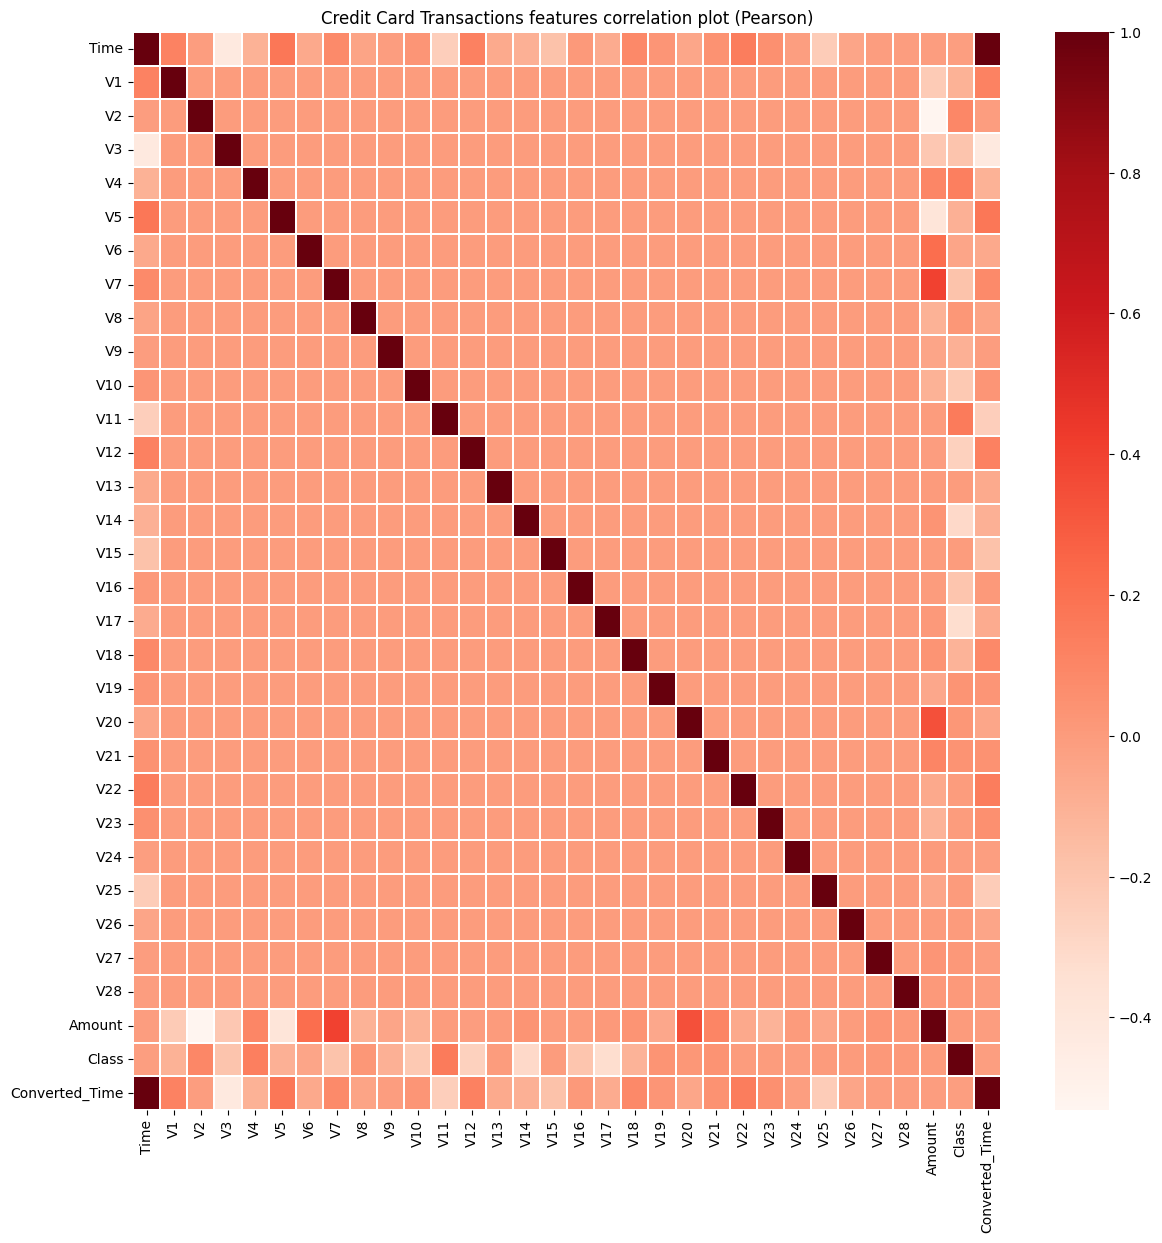

In [7]:
corr=df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')

sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()


Text(0.5, 1.0, 'Amount vs class')

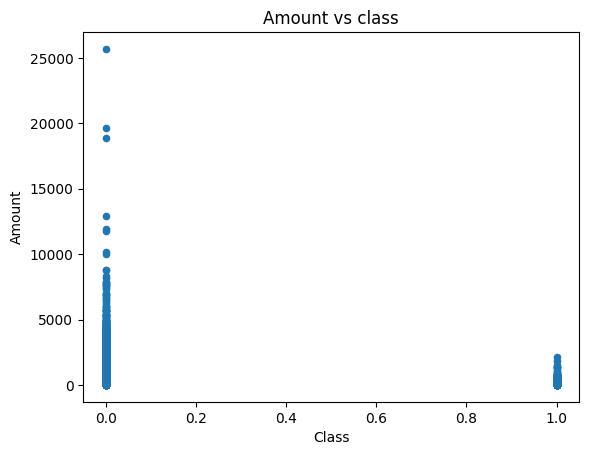

In [8]:
df.plot(kind='scatter',x='Class',y='Amount')
plt.title("Amount vs class")

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assume your dataset is in df and target column is "Class" (0 = non-fraud, 1 = fraud)
df["hour"] = df["Converted_Time"].dt.hour
df["day"] = df["Converted_Time"].dt.day
df["month"] = df["Converted_Time"].dt.month
df["dayofweek"] = df["Converted_Time"].dt.dayofweek

# Then drop original datetime
df = df.drop("Converted_Time", axis=1)

X = df.drop("Class", axis=1)   # features
y = df["Class"]                # target

# Stratified split to preserve fraud ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y, # to keep test and train with equal percentage of frauds
    random_state=42
)


In [10]:
from sklearn.metrics import recall_score
from xgboost import XGBClassifier

n_negative = (y_train == 0).sum()
n_positive = (y_train == 1).sum()
scale = n_negative / n_positive
print("scale_pos_weight:", scale)

xgb = XGBClassifier(
    n_estimators=500,        # number aof trees
    max_depth=4,             # depth of trees
    learning_rate=0.05,       # step size shrinkage
    subsample=0.8,           # row sampling
    colsample_bytree=0.8,    # feature sampling
    scale_pos_weight=scale,  # imbalance handling
    eval_metric="auc",

    random_state=42
)

xgb.fit(X_train,y_train)

y_pred=xgb.predict(X_test)
Recall=recall_score(y_test, y_pred)

scale_pos_weight: 577.2868020304569


Xgboost 


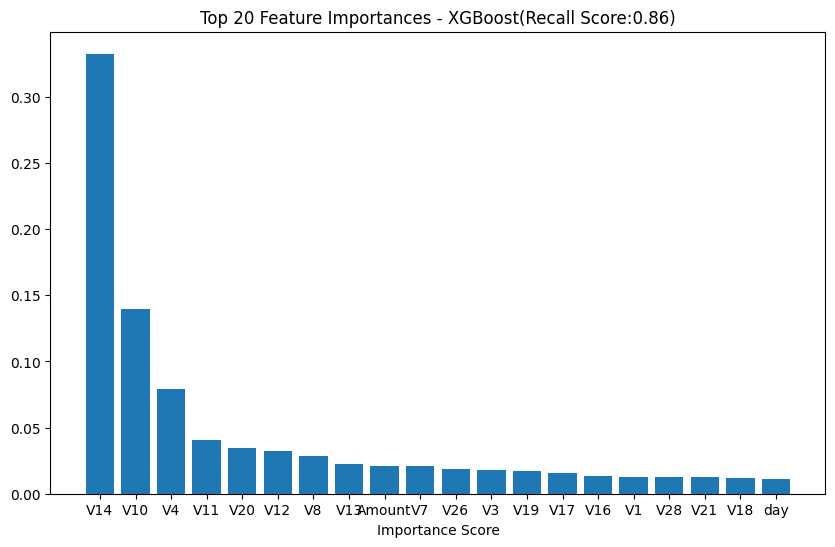

In [11]:
print(f"Xgboost ")

importance = xgb.feature_importances_

# Put into DataFrame
feature_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importance
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10,6))
plt.bar(feature_importance["feature"][:20], feature_importance["importance"][:20])
#plt.gca().invert_yaxis()
plt.title(f"Top 20 Feature Importances - XGBoost(Recall Score:{Recall:.2f})")
plt.xlabel("Importance Score")
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Define model
rf = RandomForestClassifier(
    n_estimators=500,          # number of trees
    max_depth=5,               # depth of trees
    min_samples_split=5,       # minimum samples to split a node
    min_samples_leaf=2,        # minimum samples at a leaf
    class_weight='balanced',   # handle imbalance automatically
    random_state=42,
    n_jobs=-1                  # use all CPU cores
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
recall1 = recall_score(y_test, y_pred)

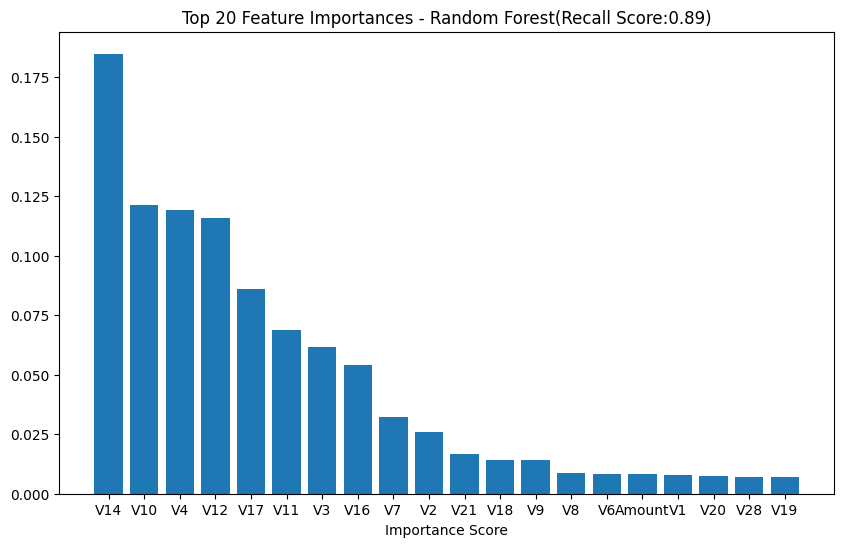

In [17]:
importance = rf.feature_importances_
feature_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importance
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10,6))
plt.bar(feature_importance["feature"][:20], feature_importance["importance"][:20])
#plt.gca().invert_yaxis()
plt.title(f"Top 20 Feature Importances - Random Forest(Recall Score:{recall1:.2f})")
plt.xlabel("Importance Score")
plt.show()

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(
    max_depth=4,               # max depth of tree
    min_samples_split=5,       # min samples to split a node
    min_samples_leaf=2,        # min samples at a leaf
    class_weight='balanced',   # handle imbalance
    random_state=42
)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
recall2 = recall_score(y_test, y_pred)

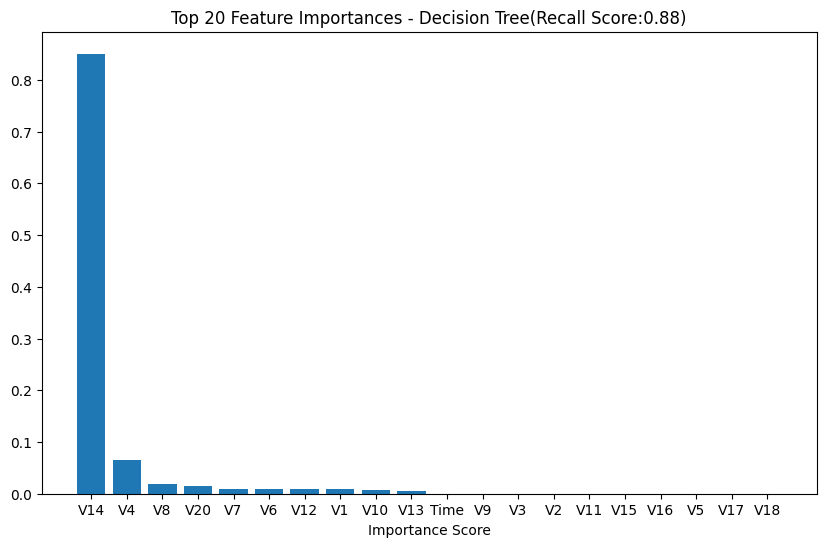

In [25]:
importance = dt.feature_importances_
feature_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importance
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10,6))
plt.bar(feature_importance["feature"][:20], feature_importance["importance"][:20])
#plt.gca().invert_yaxis()
plt.title(f"Top 20 Feature Importances - Decision Tree(Recall Score:{recall2:.2f})")
plt.xlabel("Importance Score")
plt.show()

In [49]:
from imblearn.under_sampling import RandomUnderSampler

# Define undersampler
rus = RandomUnderSampler(random_state=42)

# Apply to training data only
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

print("Original class distribution:\n", y_train.value_counts())
print("Resampled class distribution:\n", y_train_res.value_counts())
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


Original class distribution:
 Class
0    227451
1       394
Name: count, dtype: int64
Resampled class distribution:
 Class
0    394
1    394
Name: count, dtype: int64


In [50]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(
    solver='lbfgs',
    max_iter=5000,
    random_state=42
)

lr.fit(X_train_res_scaled, y_train_res)
y_pred = lr.predict(X_test_scaled)
recall3 = recall_score(y_test, y_pred)

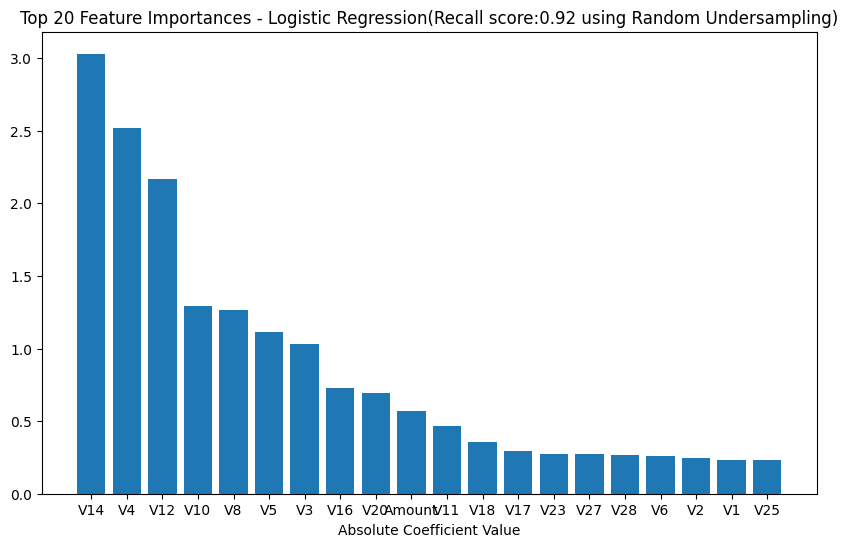

In [51]:
coefficients = pd.DataFrame({
    "feature": X_train.columns,
    "coefficient": lr.coef_[0]
})

# Sort by absolute value
coefficients["abs_coeff"] = coefficients["coefficient"].abs()
coefficients = coefficients.sort_values(by="abs_coeff", ascending=False)

# Plot top 20 features
plt.figure(figsize=(10,6))
plt.bar(coefficients["feature"][:20], coefficients["abs_coeff"][:20])
#plt.gca().invert_yaxis()
plt.title(f"Top 20 Feature Importances - Logistic Regression(Recall score:{recall3:.2f} using Random Undersampling)")
plt.xlabel("Absolute Coefficient Value")
plt.show()

In [53]:
from imblearn.over_sampling import SMOTE

# Define SMOTE
smote = SMOTE(random_state=42)

# Apply to training data only
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Original class distribution:\n", y_train.value_counts())
print("Resampled class distribution:\n", y_train_res.value_counts())

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


lr1 = LogisticRegression(
    solver='lbfgs',
    max_iter=5000,
    random_state=42
)

lr1.fit(X_train_res_scaled, y_train_res)
y_pred = lr1.predict(X_test_scaled)
recall4 = recall_score(y_test, y_pred)


Original class distribution:
 Class
0    227451
1       394
Name: count, dtype: int64
Resampled class distribution:
 Class
0    227451
1    227451
Name: count, dtype: int64


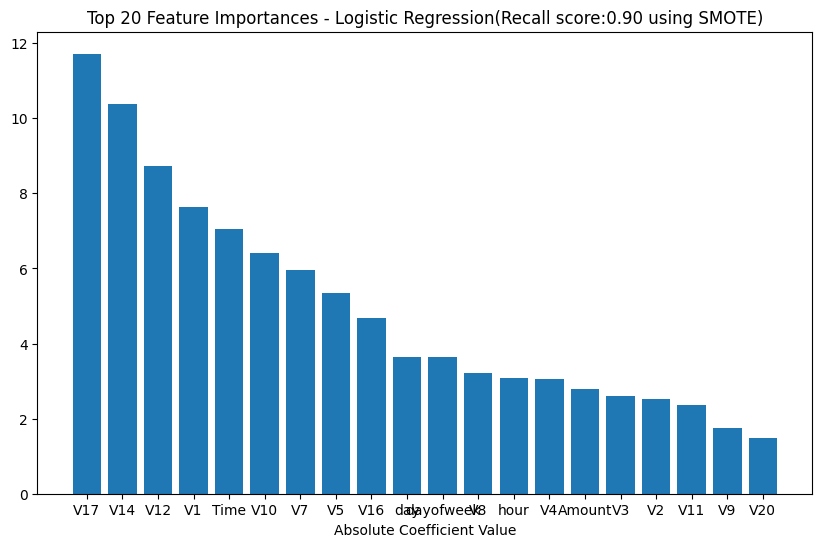

In [55]:
coefficients = pd.DataFrame({
    "feature": X_train.columns,
    "coefficient": lr1.coef_[0]
})

# Sort by absolute value
coefficients["abs_coeff"] = coefficients["coefficient"].abs()
coefficients = coefficients.sort_values(by="abs_coeff", ascending=False)

# Plot top 20 features
plt.figure(figsize=(10,6))
plt.bar(coefficients["feature"][:20], coefficients["abs_coeff"][:20])
#plt.gca().invert_yaxis()
plt.title(f"Top 20 Feature Importances - Logistic Regression(Recall score:{recall4:.2f} using SMOTE)")
plt.xlabel("Absolute Coefficient Value")
plt.show()

Original class distribution:
 Class
0    227451
1       394
Name: count, dtype: int64
Resampled class distribution:
 Class
0    227451
1    227451
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:53:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- XGBoost Evaluation with SMOTE ---
Recall Score: 0.8571428571428571


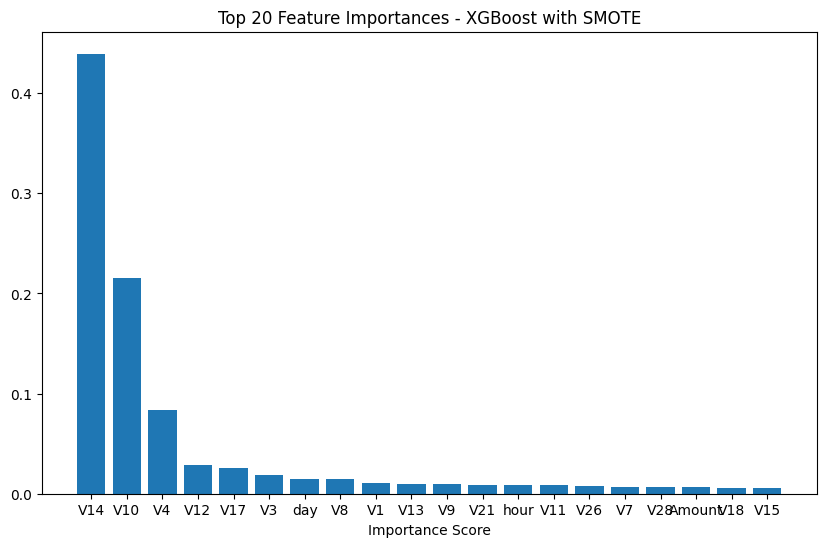

In [59]:
# Imports

#  Apply SMOTE to balance training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Original class distribution:\n", y_train.value_counts())
print("Resampled class distribution:\n", y_train_res.value_counts())

# Scale features
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

#  Define XGBoost model
n_negative = (y_train_res == 0).sum()
n_positive = (y_train_res == 1).sum()
scale = n_negative / n_positive  # optional, can keep 1 since data is balanced

xgb = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,  # already balanced by SMOTE
    eval_metric="auc",
    use_label_encoder=False,
    random_state=42
)

#  Train the model
xgb.fit(X_train_res_scaled, y_train_res)

# Predict and evaluate
y_pred = xgb.predict(X_test_scaled)
y_proba = xgb.predict_proba(X_test_scaled)[:, 1]

recall = recall_score(y_test, y_pred)


print("\n--- XGBoost Evaluation with SMOTE ---")

print("Recall Score:", recall)


# Feature Importance
import pandas as pd
import matplotlib.pyplot as plt

importance = xgb.feature_importances_
feature_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importance
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10,6))
plt.bar(feature_importance["feature"][:20], feature_importance["importance"][:20])

plt.title("Top 20 Feature Importances - XGBoost with SMOTE")
plt.xlabel("Importance Score")
plt.show()
